# Sistemas Inteligentes 2021/2022

## Mini-projeto 3: Aprendizagem Automática

## Relatório


## Grupo: XX

Número: xxx - Nome: xxx 

Número: xxx - Nome: xxx 

Número: xxx - Nome: xxx 

## 1. Processamento dos dados

(remover) Descrever e comentar os passos na leitura e processamento dos dados 

In [1]:
#imports
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, export_text


In [2]:
df = pd.read_csv("train.csv", sep=",")
df

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,0,2644,C,D-penicillamine,20296,F,N,N,N,N,0.5,369.510563,3.85,63.000000,663.000000,79.050000,124.702128,311.0,9.7,1.0
1,1,3492,C,Unknown,21915,F,Unknown,Unknown,Unknown,N,0.6,369.510563,4.38,97.648387,1982.655769,122.556346,124.702128,269.0,10.6,2.0
2,2,1702,C,D-penicillamine,18806,F,N,N,N,N,1.1,414.000000,3.44,80.000000,1003.000000,99.000000,55.000000,271.0,9.6,1.0
3,3,3523,C,Unknown,14610,F,Unknown,Unknown,Unknown,N,0.6,369.510563,4.04,97.648387,1982.655769,122.556346,124.702128,130.0,11.2,2.0
4,4,3428,D,Placebo,13727,F,N,Y,Y,Y,3.3,299.000000,3.55,131.000000,1029.000000,119.350000,50.000000,199.0,11.7,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
324,324,2255,C,D-penicillamine,22642,F,N,N,N,N,0.6,213.000000,4.07,12.000000,5300.000000,57.350000,68.000000,240.0,11.0,1.0
325,325,1899,C,Unknown,14975,M,Unknown,Unknown,Unknown,N,1.7,369.510563,3.66,97.648387,1982.655769,122.556346,124.702128,92.0,11.0,4.0
326,326,1152,D,D-penicillamine,25546,M,N,Y,N,N,2.3,586.000000,3.01,243.000000,2276.000000,114.700000,126.000000,339.0,10.9,3.0
327,327,71,D,D-penicillamine,18972,F,N,Y,Y,S,12.2,394.000000,3.08,111.000000,2132.000000,155.000000,243.000000,165.0,11.6,4.0


In [3]:
col_indexs=[x for x in range(1,19)]

print(col_indexs)
print("____________________________________________________________________________")
col_names=np.array(df.columns)[col_indexs]
print(col_names)
print("____________________________________________________________________________")
X=df.values[:,col_indexs]
print(X)
print("____________________________________________________________________________")
y=df.values[:,19]
y=y.astype('int')
print(y)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]
____________________________________________________________________________
['N_Days' 'Status' 'Drug' 'Age' 'Sex' 'Ascites' 'Hepatomegaly' 'Spiders'
 'Edema' 'Bilirubin' 'Cholesterol' 'Albumin' 'Copper' 'Alk_Phos' 'SGOT'
 'Tryglicerides' 'Platelets' 'Prothrombin']
____________________________________________________________________________
[[2644 'C' 'D-penicillamine' ... 124.70212765957449 311.0 9.7]
 [3492 'C' 'Unknown' ... 124.70212765957449 269.0 10.6]
 [1702 'C' 'D-penicillamine' ... 55.0 271.0 9.6]
 ...
 [1152 'D' 'D-penicillamine' ... 126.0 339.0 10.9]
 [71 'D' 'D-penicillamine' ... 243.0 165.0 11.6]
 [1874 'C' 'Placebo' ... 81.0 295.0 9.8]]
____________________________________________________________________________
[1 2 1 2 3 4 3 4 4 4 4 1 1 3 3 1 3 4 4 4 1 2 2 2 3 2 4 4 4 4 3 1 4 4 3 3 4
 3 3 2 4 3 2 2 3 3 4 3 3 2 4 4 2 2 2 3 4 1 4 1 3 2 2 3 3 4 4 4 3 3 3 4 3 3
 3 2 2 4 4 3 3 3 2 2 2 4 3 4 4 3 4 4 3 4 3 3 4 3 4 

In [4]:
df_X = df[col_names]
print(df_X)

     N_Days Status             Drug    Age Sex  Ascites Hepatomegaly  Spiders  \
0      2644      C  D-penicillamine  20296   F        N            N        N   
1      3492      C          Unknown  21915   F  Unknown      Unknown  Unknown   
2      1702      C  D-penicillamine  18806   F        N            N        N   
3      3523      C          Unknown  14610   F  Unknown      Unknown  Unknown   
4      3428      D          Placebo  13727   F        N            Y        Y   
..      ...    ...              ...    ...  ..      ...          ...      ...   
324    2255      C  D-penicillamine  22642   F        N            N        N   
325    1899      C          Unknown  14975   M  Unknown      Unknown  Unknown   
326    1152      D  D-penicillamine  25546   M        N            Y        N   
327      71      D  D-penicillamine  18972   F        N            Y        Y   
328    1874      C          Placebo  24257   F        N            N        N   

    Edema  Bilirubin  Chole

In [5]:
df_Xdummies = pd.get_dummies(df_X, columns = col_names)
col_names_dum=np.array(df_Xdummies.columns)

print(df_Xdummies)
print("____________________________________________________________________________")
print(col_names_dum)

     N_Days_41  N_Days_43  N_Days_51  N_Days_71  N_Days_77  N_Days_110  \
0            0          0          0          0          0           0   
1            0          0          0          0          0           0   
2            0          0          0          0          0           0   
3            0          0          0          0          0           0   
4            0          0          0          0          0           0   
..         ...        ...        ...        ...        ...         ...   
324          0          0          0          0          0           0   
325          0          0          0          0          0           0   
326          0          0          0          0          0           0   
327          0          0          0          1          0           0   
328          0          0          0          0          0           0   

     N_Days_111  N_Days_130  N_Days_131  N_Days_179  ...  Prothrombin_12.9  \
0             0           0      

In [6]:
X_dummies=df_Xdummies.values
X_dummies

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

________________________________________________________

In [7]:
sk_dt=DecisionTreeClassifier(criterion = "entropy")
sk_dt.fit(X_dummies, y)

DecisionTreeClassifier(criterion='entropy')

In [8]:
print('Profundidade da árvore obtida:', sk_dt.get_depth())
print('Número de folhas da árvore obtida:', sk_dt.get_n_leaves())

Profundidade da árvore obtida: 46
Número de folhas da árvore obtida: 148


_______________________________

In [9]:
preds = sk_dt.predict(X_dummies)
for i in range(df_Xdummies.shape[0]):
    print(f"Classe real: {y[i]}; Previsão: {preds[i]} ")
    
print("\nNúmero Total de más predições: ", sum(preds!=y))

Classe real: 1; Previsão: 1 
Classe real: 2; Previsão: 2 
Classe real: 1; Previsão: 1 
Classe real: 2; Previsão: 2 
Classe real: 3; Previsão: 3 
Classe real: 4; Previsão: 4 
Classe real: 3; Previsão: 3 
Classe real: 4; Previsão: 4 
Classe real: 4; Previsão: 4 
Classe real: 4; Previsão: 4 
Classe real: 4; Previsão: 4 
Classe real: 1; Previsão: 1 
Classe real: 1; Previsão: 1 
Classe real: 3; Previsão: 3 
Classe real: 3; Previsão: 3 
Classe real: 1; Previsão: 1 
Classe real: 3; Previsão: 3 
Classe real: 4; Previsão: 4 
Classe real: 4; Previsão: 4 
Classe real: 4; Previsão: 4 
Classe real: 1; Previsão: 1 
Classe real: 2; Previsão: 2 
Classe real: 2; Previsão: 2 
Classe real: 2; Previsão: 2 
Classe real: 3; Previsão: 3 
Classe real: 2; Previsão: 2 
Classe real: 4; Previsão: 4 
Classe real: 4; Previsão: 4 
Classe real: 4; Previsão: 4 
Classe real: 4; Previsão: 4 
Classe real: 3; Previsão: 3 
Classe real: 1; Previsão: 1 
Classe real: 4; Previsão: 4 
Classe real: 4; Previsão: 4 
Classe real: 3

In [10]:
from sklearn.tree import export_text
the_tree = export_text(sk_dt,feature_names=list(col_names_dum))
print(the_tree)

|--- Hepatomegaly_Y <= 0.50
|   |--- Status_C <= 0.50
|   |   |--- Edema_N <= 0.50
|   |   |   |--- Spiders_Y <= 0.50
|   |   |   |   |--- Age_18628 <= 0.50
|   |   |   |   |   |--- class: 4
|   |   |   |   |--- Age_18628 >  0.50
|   |   |   |   |   |--- class: 1
|   |   |   |--- Spiders_Y >  0.50
|   |   |   |   |--- Tryglicerides_143.0 <= 0.50
|   |   |   |   |   |--- class: 3
|   |   |   |   |--- Tryglicerides_143.0 >  0.50
|   |   |   |   |   |--- class: 4
|   |   |--- Edema_N >  0.50
|   |   |   |--- Prothrombin_10.7 <= 0.50
|   |   |   |   |--- Prothrombin_11.0 <= 0.50
|   |   |   |   |   |--- Prothrombin_10.5 <= 0.50
|   |   |   |   |   |   |--- Drug_D-penicillamine <= 0.50
|   |   |   |   |   |   |   |--- Prothrombin_10.2 <= 0.50
|   |   |   |   |   |   |   |   |--- Copper_217.0 <= 0.50
|   |   |   |   |   |   |   |   |   |--- Age_24472 <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- Albumin_4.1 <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of d

_______

## 2. Ajustamento dos modelos


### 2.1. Teste de modelos e validação

(remover) Enunciar as várias abordagens testadas para
* Criar modelos
* Validar modelos
* Avaliar a qualidade dos modelos

Validar Modelo

In [11]:
#imports
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X_dummies, y, test_size=0.22, random_state=42)

In [13]:
X_train.shape

(256, 1966)

In [14]:
X_test.shape

(73, 1966)

In [15]:
print(X_train)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [16]:
print(y_train)

[2 3 2 4 2 2 2 4 4 2 1 4 3 4 4 4 2 1 2 1 3 4 4 3 2 4 2 4 4 4 4 3 3 3 2 3 3
 3 1 2 4 4 4 2 4 3 4 4 3 3 3 3 2 2 3 4 3 4 3 2 3 2 4 1 4 2 1 3 3 2 4 4 2 4
 3 2 2 2 3 2 4 3 3 4 4 2 3 2 2 3 4 3 1 2 4 4 4 4 3 4 3 4 2 4 4 3 2 4 4 3 2
 4 3 4 4 2 3 1 3 4 2 2 4 2 3 4 3 4 2 3 3 3 1 3 4 4 3 2 1 3 3 4 2 4 4 3 2 2
 1 4 4 3 2 4 3 3 4 1 4 2 3 4 3 3 4 3 4 4 3 2 2 2 3 4 2 4 4 3 3 3 4 3 3 3 3
 4 4 4 3 3 3 3 4 3 3 4 2 3 3 2 2 3 1 3 2 2 2 2 3 3 3 3 4 2 4 3 3 4 2 4 3 4
 2 3 2 4 4 3 4 2 3 4 3 4 4 2 4 3 4 4 1 3 3 4 4 2 4 4 4 2 1 3 4 2 3 2]


In [17]:
dtc = DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=3, min_samples_leaf=5)
dtc.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=5,
                       random_state=3)

In [18]:
dtc.score(X_test, y_test)

0.4520547945205479

In [19]:
dtc.score(X_train,y_train)

0.5234375

[52.34375, 52.34375, 52.34375, 52.34375, 52.34375, 52.34375, 52.34375, 52.34375, 52.34375]
[45.20547945205479, 45.20547945205479, 45.20547945205479, 45.20547945205479, 45.20547945205479, 45.20547945205479, 45.20547945205479, 45.20547945205479, 45.20547945205479]


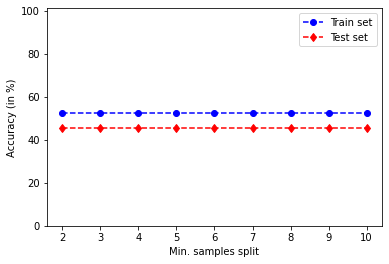

In [20]:
import matplotlib.pyplot as plt

train = []
test = []
for i in range(2,11):
    dtc2 = DecisionTreeClassifier(criterion='entropy', max_depth=15, random_state=4, min_samples_leaf=i)
    dtc2.fit(X_train,y_train)
    train.append(dtc.score(X_train,y_train)*100)
    test.append(dtc.score(X_test,y_test)*100)

print(train)
print(test)
# fazer um gráfico com a accuracy
x = np.arange(2,11,1) # intervalo do eixo dos xx's
plt.plot(x, train, 'bo--', label='Train set')
plt.plot(x, test, 'rd--', label='Test set')
plt.ylim(0,101) # limite dos eixo dos yy's
plt.xlabel('Min. samples split') # legenda do eixo dos xx's
plt.ylabel('Accuracy (in %)') # legenda do eixo dos yy's
plt.legend() # legenda
plt.show()

[52.34375, 52.34375, 52.34375, 52.34375, 52.34375, 52.34375, 52.34375, 52.34375, 52.34375]
[45.20547945205479, 45.20547945205479, 45.20547945205479, 45.20547945205479, 45.20547945205479, 45.20547945205479, 45.20547945205479, 45.20547945205479, 45.20547945205479]


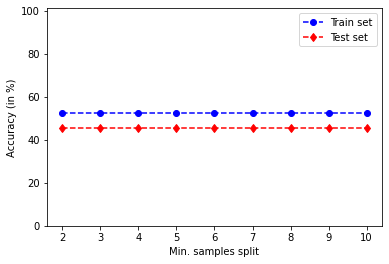

In [21]:
import matplotlib.pyplot as plt

train = []
test = []
for i in range(2,11):
    dtc3 = DecisionTreeClassifier(criterion='entropy', max_depth=15, min_samples_leaf=6)
    dtc3.fit(X_train,y_train)
    train.append(dtc.score(X_train,y_train)*100)
    test.append(dtc.score(X_test,y_test)*100)

print(train)
print(test)
# fazer um gráfico com a accuracy
x = np.arange(2,11,1) # intervalo do eixo dos xx's
plt.plot(x, train, 'bo--', label='Train set')
plt.plot(x, test, 'rd--', label='Test set')
plt.ylim(0,101) # limite dos eixo dos yy's
plt.xlabel('Min. samples split') # legenda do eixo dos xx's
plt.ylabel('Accuracy (in %)') # legenda do eixo dos yy's
plt.legend() # legenda
plt.show()

In [22]:
from sklearn.model_selection import cross_val_score

dtc4 = DecisionTreeClassifier(criterion='entropy')
scores = cross_val_score(dtc4,
                         X=X_train,
                         y=y_train,
                         cv=10
                        )
print('CV accuracy:', *scores, sep='\n\t')
print('Average CV accuracy: %.3f +/- %.3f' %(np.mean(scores), np.std(scores)))

CV accuracy:
	0.3076923076923077
	0.38461538461538464
	0.5
	0.3076923076923077
	0.38461538461538464
	0.4230769230769231
	0.4
	0.44
	0.36
	0.24
Average CV accuracy: 0.375 +/- 0.071


In [23]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

dtc5 = DecisionTreeClassifier(criterion='entropy', max_depth = 4, min_samples_split = 4)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
dtc5.fit(X_train, y_train)

preds2 = dtc5.predict(X_test)

print("Árvore original")
print("A accuracy é: %7.4f" % accuracy_score(y_test, preds2))
print("A precision é: %7.4f" % precision_score(y_test, preds2))
print("O recall é: %7.4f" % recall_score(y_test, preds2))
print("O score F1 é: %7.4f" % f1_score(y_test, preds2))

ValueError: could not convert string to float: 'C'

In [35]:
from sklearn.metrics import confusion_matrix
dtc6 = DecisionTreeClassifier(criterion='entropy', max_depth = 4, min_samples_split = 4)


X_train, X_test, y_train, y_test = train_test_split(x,
                                                    y,
                                                    random_state=8)
dtc6.fit(X_train,y_train)
print("Accuracy: %.3f" % dtc6.score(X_test,y_test))
preds = dtc6.predict(X_test)
print("\nMatriz de Confusão")
pd.DataFrame(confusion_matrix(y_test, preds), columns=col_names, index=col_indexs)


ValueError: Found input variables with inconsistent numbers of samples: [9, 329]

In [28]:
dtc = DecisionTreeClassifier(criterion='entropy')
scores = cross_val_score(dtc,
                         X=X_dummies,
                         y=y,
                         cv=10,
                         scoring='recall_macro'
                        )
scores

array([0.2972028 , 0.32042957, 0.24275724, 0.33616384, 0.26488095,
       0.39880952, 0.28571429, 0.23958333, 0.30208333, 0.48674242])

### 2.2. Seleção e apresentação do melhor modelo

(remover) Apresentar todos os resultados para cada modelo obtido

* Elencar o critério de selecção
* Apresentar a árvore (se aplicável)
* Discutir os resultados


## 3. Validação do modelo final ajustado com um conjunto de validação independente

(remover) O ficheiro `test.csv` contém um conjunto de dados não usado para treinar o modelo definido no ponto #2. 
* Preparar o data set
* Correr o modelo selecionado como sendo o melhor nestes dados
* Apresentar os resultados para as métricas de validação
* Discutir os resultados alcançados confrontando os resultados com os obtidos anteriormente

## 4. Competição

(remover) Explicar os passos feitos para chegar à solução submetida na competição, tendo em conta:

* A escolha dos parâmetros usados pelos classificadores
* A escolha de atributos mais relevantes para a aprendizagem dos modelos
    